# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [284]:
# Import your libraries

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm

# from scipy.stats import *


# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [285]:
# Your code here

data_normal = norm.rvs(size=10,loc=50,scale=5)

test = stats.normaltest(data_normal)

print(test)


NormaltestResult(statistic=8.870509413544209, pvalue=0.011852046726586863)


In [286]:
data_normal2 = norm.rvs(size=50,loc=50,scale=5)

test = stats.normaltest(data_normal2)

print(test)

NormaltestResult(statistic=1.2354710833601246, pvalue=0.539163970621781)


In [287]:
data_normal3 = norm.rvs(size=500,loc=50,scale=5)

test = stats.normaltest(data_normal3)

print(test)

NormaltestResult(statistic=1.288096303426348, pvalue=0.5251621789999962)


In [288]:
data_normal4 = norm.rvs(size=5000,loc=50,scale=5)

test = stats.normaltest(data_normal4)

print(test)

NormaltestResult(statistic=2.9370623297185556, pvalue=0.2302634559700316)


#### Interpret the normaltest results and make your observations.

# Explain the test results here

Hipótesis nula: "La distribución es normal"

Siendo alfa, nivel de significación, de 0,05 (por convención).

El p-valor se sitúa por encima de dicho valor, por lo tanto no rechazamos la hipótesis nula.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

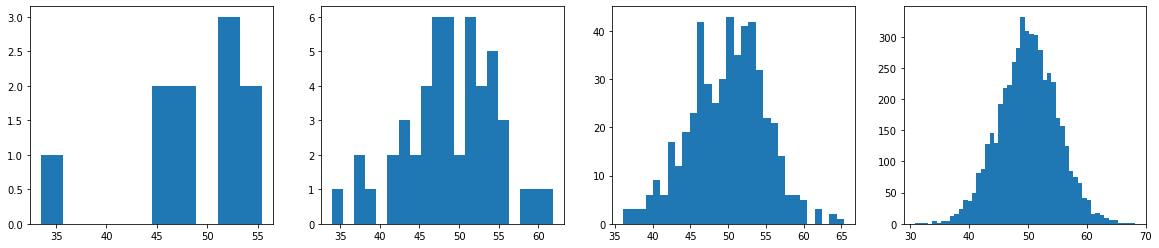

In [289]:
# Your code here

# plt.figure(figsize=(20,4))
# plt.subplot(1,4,1)
# plt.hist(data_normal,normed=True)
# plt.subplot(1,4,2)
# plt.hist(data_normal2, normed=True)
# plt.subplot(1,4,3)
# plt.hist(data_normal3, normed=True)
# plt.subplot(1,4,4)
# plt.hist(data_normal4, normed=True)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.hist(data_normal, bins=10)
plt.subplot(1,4,2)
plt.hist(data_normal2, bins=20)
plt.subplot(1,4,3)
plt.hist(data_normal3, bins=30)
plt.subplot(1,4,4)
plt.hist(data_normal4, bins=50)

plt.show()



#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here

Cuanto mayor es en el número de muestras, se obtiene una aproximación a la Distribución normal más precisa.


# Challenge 2 - Plot Probability Mass Function (PMP)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

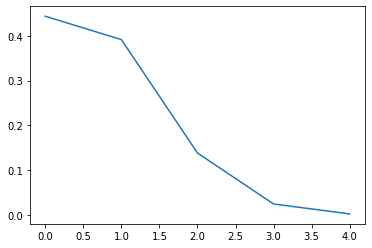

In [290]:
# Your code here

r = binom(5, 0.15)

x = np.arange(5)

plt.plot(x,stats.binom.pmf(x, 5, 0.15))


#### Explain what you observe from the plot above

# Your comment here

Se considera éxito que una persona de una población de 5 personas haya clickado en un anuncio.


Un éxito (una persona ha clickado de cinco) tiene una probabilidad de 0,40 de suceder.

Dos éxitos (dos personas han clickado de cinco) tiene una probabilidad de 0,15 de suceder.


Y así sucesivamente.



#### Now plot PMP with 50, 500, and 5000 visitors.

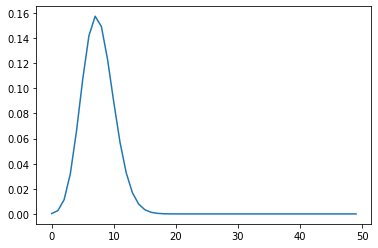

In [291]:
# Your code here

r = binom(5, 0.15)

x = np.arange(50)

plt.plot(x,stats.binom.pmf(x, 50, 0.15))




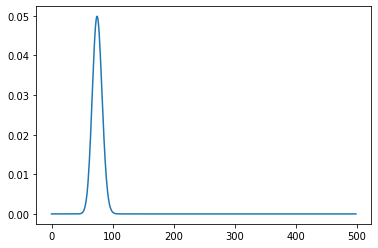

In [292]:
r = binom(5, 0.15)

x = np.arange(500)

plt.plot(x,stats.binom.pmf(x, 500, 0.15))

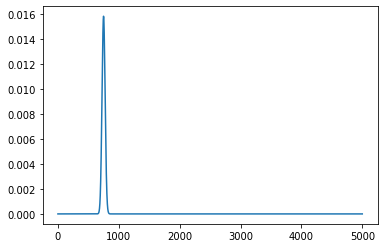

In [293]:
r = binom(5, 0.15)

x = np.arange(5000)

plt.plot(x,stats.binom.pmf(x, 5000, 0.15))

#### What did you notice from the distribution plots? Comment your findings.

# Your comment here
A mayor tamaño de la población, el número de éxitos se desplaza hacia la derecha de forma acorde a dicho aumento de población y de forma acorde a la probabilidad de éxito.

De este modo, en la última gráfica, el mayor número de personas que clickan anuncios se sitúa en torno a las 800, mientras que la probabilidad de dicho éxito se sitúa en un 0,016%.

La forma "acampanada" de los éxitos, se traduce en la muy escasa probabilidad de que pocas personas clicken anuncios, así como que un gran porcentaje de personas clicken anuncios.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

Refleja la probabilidad de que ocurra un determinado número de eventos en un determinado periodo de tiempo

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [294]:
# Your code here

r = poisson.pmf(320, 300)

r

0.011612348610402475

#### What is the probability of getting 60 visits?

In [295]:
# Your code here

r = poisson.pmf(60, 300)

r

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

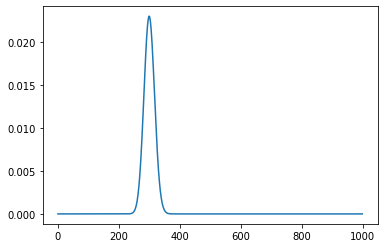

In [296]:
# your code here

rango = np.arange(0,1000)
result = [poisson.pmf(element,300) for element in rango]


plt.plot(rango,result)
r = poisson.pmf(60, 300)